In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline                  # معدش ليها لازمة بدامك شغالة على جوبيتر  
                                     # والصراحة مش عارف ليها لازمة فى حتة تانية ولا لا 

#import matplotlib.pyplot as pls        ملهاش لازمة
# import warnings 
# warnings.filterwarnings("ignore")   # حاولى ما تستخدميهاش الا اذا كان فعلا فيه ووريننج ما ينفعش يتحل 

# exploring data

In [3]:
df = pd.read_csv('mymoviedb.csv', lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [10]:
df.shape

(9827, 9)

In [11]:
df.nunique()

Release_Date         5893
Title                9513
Overview             9822
Popularity           8160
Vote_Count           3266
Vote_Average           74
Original_Language      43
Genre                2337
Poster_Url           9827
dtype: int64

- Date release column type needs to be changed
- Also vote counts and vote average

# cleaning data

In [12]:
#checking for duplicates
df.duplicated().sum()

0

In [13]:
#checking for null values
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [14]:
# #dropping null values
# df = df.dropna()
# df.isnull().sum()

In [15]:
#changing data type of release_date column to datetime
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors ='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9827 non-null   object        
 2   Overview           9827 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9827 non-null   int64         
 5   Vote_Average       9827 non-null   float64       
 6   Original_Language  9827 non-null   object        
 7   Genre              9827 non-null   object        
 8   Poster_Url         9827 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 691.1+ KB


In [16]:
#create new column for year
df['Year'] = df['Release_Date'].dt.year

In [17]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Year
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021


In [18]:
#changing data type for vote agerage column and vote counts
df['Vote_Average']= df['Vote_Average'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9827 non-null   object        
 2   Overview           9827 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9827 non-null   int64         
 5   Vote_Average       9827 non-null   float64       
 6   Original_Language  9827 non-null   object        
 7   Genre              9827 non-null   object        
 8   Poster_Url         9827 non-null   object        
 9   Year               9827 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 767.9+ KB


In [19]:
df['Vote_Count']= df['Vote_Count'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9827 non-null   object        
 2   Overview           9827 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9827 non-null   int32         
 5   Vote_Average       9827 non-null   float64       
 6   Original_Language  9827 non-null   object        
 7   Genre              9827 non-null   object        
 8   Poster_Url         9827 non-null   object        
 9   Year               9827 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(5)
memory usage: 729.5+ KB


In [20]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url,Year
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...,2021
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...,2022
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...,2022
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...,2021
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...,2021


In [21]:
df.describe()

,Popularity,Vote_Count,Vote_Average,Year
count,9827.000000,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534,2006.203623
std,108.873998,2611.206907,1.129759,15.685554
min,13.354000,0.000000,0.000000,1902.000000
25%,16.128500,146.000000,5.900000,2000.000000
50%,21.199000,444.000000,6.500000,2011.000000
75%,35.191500,1376.000000,7.100000,2017.000000
max,5083.954000,31077.000000,10.000000,2024.000000


In [22]:
#exploring geners
df.Genre.value_counts()

Drama                                      466
Comedy                                     403
Drama, Romance                             248
Horror                                     238
Horror, Thriller                           199
                                          ... 
Fantasy, Thriller, Horror                    1
Comedy, Documentary                          1
Drama, Music, Romance, Comedy                1
Horror, Mystery, Drama, Thriller             1
Thriller, Mystery, Drama, Horror, Crime      1
Name: Genre, Length: 2337, dtype: int64

# visualization

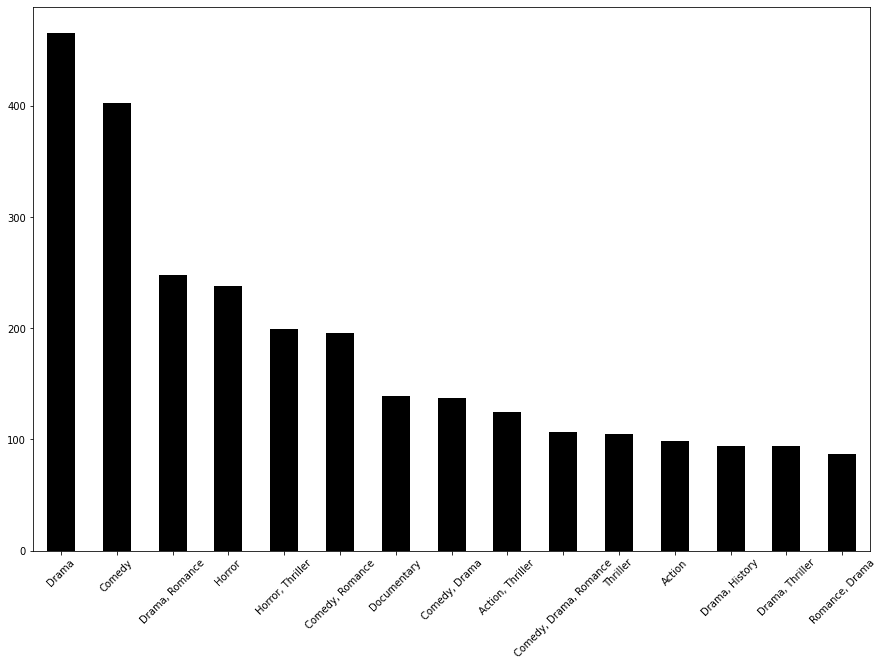

In [25]:
#most genre
df['Genre'].value_counts().head(15).plot.bar(figsize=(15,10), color='black')
plt.xticks(rotation=45)
plt.show()

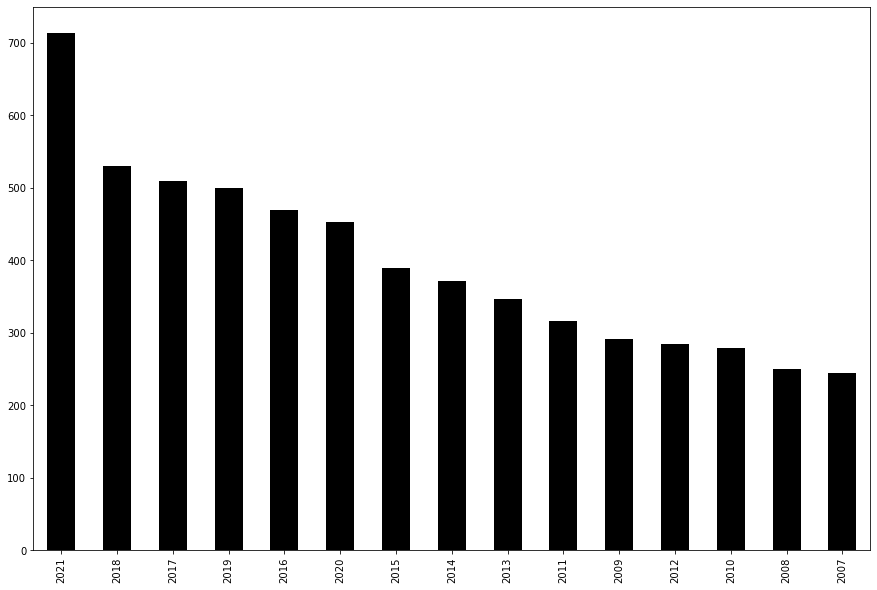

In [172]:
#most year
df['Year'].value_counts().head(15).plot.bar(figsize=(15,10), color='black')
plt.show()